In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 6.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Time Series/HINDUNILVR.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-23,2625.0,2672.850098,2594.500000,2634.149902,2572.177490,2163220
1,2021-08-24,2634.0,2658.000000,2610.000000,2633.000000,2571.054688,1482854
2,2021-08-25,2632.0,2666.449951,2620.649902,2645.000000,2582.772217,1746570
3,2021-08-26,2631.0,2697.800049,2631.000000,2666.399902,2603.668701,2117291
4,2021-08-27,2669.0,2690.000000,2651.100098,2677.949951,2614.947021,1176229


In [ ]:
df.tail(5)

In [ ]:
df.shape

(248, 7)

In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       248 non-null    datetime64[ns]
 1   Open       248 non-null    float64       
 2   High       248 non-null    float64       
 3   Low        248 non-null    float64       
 4   Close      248 non-null    float64       
 5   Adj Close  248 non-null    float64       
 6   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.7 KB


In [ ]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
df1=df.iloc[:,1:2].values
type(df1)

numpy.ndarray

In [ ]:
df1.ndim

2

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df1=mms.fit_transform(df1)

In [ ]:
df1

array([[0.77539167],
       [0.78535459],
       [0.78314061],
       [0.78203361],
       [0.82409927],
       [0.84911737],
       [0.84502128],
       [0.90823057],
       [0.91155154],
       [0.97155039],
       [0.95804516],
       [0.95649548],
       [0.95682736],
       [0.94918923],
       [0.96634759],
       [0.97132905],
       [0.9403333 ],
       [0.9159795 ],
       [0.93601615],
       [0.8805558 ],
       [0.98018497],
       [1.        ],
       [0.96800807],
       [0.93601615],
       [0.93037039],
       [0.88609075],
       [0.87496544],
       [0.84214327],
       [0.86505793],
       [0.85841598],
       [0.84313945],
       [0.85182944],
       [0.856202  ],
       [0.82575975],
       [0.79443186],
       [0.77539167],
       [0.8452429 ],
       [0.79946872],
       [0.82830589],
       [0.82509545],
       [0.71340018],
       [0.64078148],
       [0.59163119],
       [0.58620705],
       [0.60259029],
       [0.58720323],
       [0.52631873],
       [0.526

In [ ]:
df1.shape

(248, 1)

In [ ]:
x_train=df1[0:247]
y_train=df1[1:248]

In [ ]:
x_train.shape

(247, 1)

In [ ]:
y_train.shape

(247, 1)

In [ ]:
x_train=np.reshape(x_train,(247,1,1))
#reshape data,rows,timestamp

In [ ]:
from tensorflow.keras.models import Sequential #initialize neural network
from tensorflow.keras.layers import Dense  #to add input ouput and hidden layer
from tensorflow.keras.layers import LSTM,Dropout    #to built the model
#long short term memory  to manage internal memory, store previous o/p

In [ ]:
#create object of sequential class
model=Sequential()

In [ ]:
#to add layers in the model
model.add(LSTM(units=50,activation='sigmoid',input_shape=(None,1)))
#none means to take no of rows and 1 means 1 column
model.add(Dropout(0.1))
#to add output layer
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
x_train1=x_train[:198]   #splitting 80% data of training 
x_test=x_train[198:]

In [ ]:
y_train1=y_train[:198]  #splitting 80% data of training
y_test=y_train[198:]  

In [ ]:
#train the model
from tensorflow.keras.callbacks import EarlyStopping

#proceedure for callback(EarlyStopping)
cb=EarlyStopping(monitor='val_loss', #val_loss means testing error
                  #value of lambda
                                   min_delta=0.0001, patience=20, 
                                    verbose=1, mode='auto', #min loss
                                    baseline=None, 
                                    restore_best_weights=False)

In [ ]:
trained_model=model.fit(x_train1,y_train1,validation_data=(x_test,y_test),epochs=100,batch_size=10,callbacks=cb)

Epoch 1/100
20/20 [==============================] - 2s 24ms/step - loss: 0.0647 - val_loss: 0.0669
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0602 - val_loss: 0.0582
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0589 - val_loss: 0.0531
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0578 - val_loss: 0.0527
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0573 - val_loss: 0.0536
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0562 - val_loss: 0.0528
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0568 - val_loss: 0.0520
Epoch 8/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0567 - val_loss: 0.0522
Epoch 9/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0542 - val_loss: 0.0515
Epoch 10/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0528 - val_loss: 0.0498
Epoch

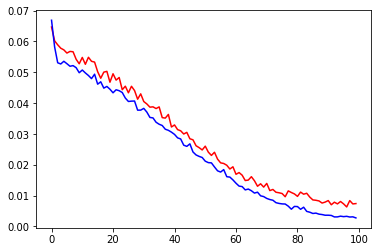

In [ ]:
plt.plot(trained_model.history['loss'],color='red',label='training loss')
plt.plot(trained_model.history['val_loss'],color='blue',label='validation loss')
plt.show()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
#to remove scaling
y_pred=mms.inverse_transform(y_pred)
y_pred

array([[2210.4263],
       [2181.676 ],
       [2185.8008],
       [2205.1074],
       [2178.1587],
       [2167.1414],
       [2179.2192],
       [2141.0945],
       [2208.691 ],
       [2203.689 ],
       [2220.0615],
       [2272.1462],
       [2320.752 ],
       [2325.3975],
       [2301.812 ],
       [2235.151 ],
       [2236.1445],
       [2282.5342],
       [2387.2854],
       [2402.1638],
       [2498.017 ],
       [2473.062 ],
       [2482.3984],
       [2471.7688],
       [2461.883 ],
       [2496.087 ],
       [2519.0095],
       [2559.0615],
       [2535.1357],
       [2554.5525],
       [2584.9363],
       [2584.9363],
       [2603.9685],
       [2590.4084],
       [2523.3901],
       [2590.4084],
       [2600.396 ],
       [2598.756 ],
       [2572.9712],
       [2583.7256],
       [2596.4438],
       [2599.085 ],
       [2603.904 ],
       [2607.0793],
       [2610.6877],
       [2590.3408],
       [2578.6233],
       [2607.4934],
       [2628.2288]], dtype=float32)

In [ ]:
y_test1=mms.inverse_transform(y_test)
y_test1

array([[2163.      ],
       [2168.      ],
       [2190.850098],
       [2158.699951],
       [2145.      ],
       [2160.      ],
       [2111.      ],
       [2195.      ],
       [2189.199951],
       [2208.      ],
       [2265.      ],
       [2315.850098],
       [2320.649902],
       [2296.199951],
       [2224.899902],
       [2226.      ],
       [2276.      ],
       [2384.5     ],
       [2400.      ],
       [2505.      ],
       [2476.449951],
       [2487.      ],
       [2475.      ],
       [2464.      ],
       [2502.75    ],
       [2530.      ],
       [2581.      ],
       [2549.949951],
       [2575.      ],
       [2617.      ],
       [2617.      ],
       [2645.5     ],
       [2625.      ],
       [2535.350098],
       [2625.      ],
       [2640.      ],
       [2637.5     ],
       [2600.      ],
       [2615.25    ],
       [2634.      ],
       [2638.      ],
       [2645.399902],
       [2650.350098],
       [2656.050049],
       [2624.899902],
       [26

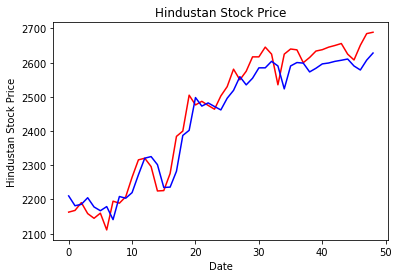

In [ ]:
#for compare actual stock price and predicted stock price, using visualization 
plt.plot(y_test1,color='red',label='Actual Stock Price')
plt.plot(y_pred,color='blue',label='Predicted Stock Price')
plt.title('Hindustan Stock Price')
plt.xlabel('Date')
plt.ylabel('Hindustan Stock Price')
plt.show()

In [ ]:
#predict next day stock price 
n=float(input('Enter today opening Stock Price:'))
#here n is scaler variable 
#print(type(n))
#first convert n into 2D array
n=np.array(n).reshape(-1,1) #here -1 means automatic accept no
#print(type(n))
#print(n.ndim)
#apply scaling means normalisation minmaxscaler
n1=mms.transform(n)
#print(n1)
#convert n1 from 2D into 3D array
v=n1.reshape(-1,1,1)
#print(v.ndim)
#print(v)
#prediction
pred=model.predict(v)
#to remove scaling
final=mms.inverse_transform(pred)
print('Opening Price of Next Day',final)